In [73]:
import pandas as pd
import numpy as np

In [74]:
df1=pd.read_csv("Content.csv")
df2=pd.read_csv("Reactions.csv")
df3=pd.read_csv("ReactionTypes.csv")

In [75]:
df1.head()
df1.rename(columns={'Type': 'Content_Type'}, inplace=True)


In [76]:
#df1.rename(columns={'Type': 'Content_Type'}, inplace=True)
#df1.drop(['User ID', 'URL'], axis=1,inplace=True)
# Drop the 'Unnamed' column permanently




In [77]:
print(df1.Category.unique())
df1['Category'].value_counts()

['Studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'studying' 'veganism' 'Animals' 'animals' 'culture' '"culture"' 'Fitness'
 '"studying"' 'Veganism' '"animals"' 'Travel' '"soccer"' 'Education'
 '"dogs"' 'Technology' 'Soccer' '"tennis"' 'Culture' '"food"' 'Food'
 '"technology"' 'Healthy Eating' '"cooking"' 'Science' '"public speaking"'
 '"veganism"' 'Public Speaking' '"science"']


Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [78]:
df1['Category'] = df1['Category'].str.lower().str.strip('"')

print(df1.Category.unique())
df1['Category'].value_counts()

['studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'veganism' 'animals' 'culture']


Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [79]:
df1.isnull().sum()

Content ID      0
Content_Type    0
Category        0
dtype: int64

In [80]:
df2.drop(['User ID'], axis=1,inplace=True) #use inplace for permanent deletion

In [81]:
df2.isnull().sum()


Content ID      0
Type          980
Datetime        0
dtype: int64

In [82]:
df2 = df2.dropna()
df2.isnull().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

In [83]:
df2.Type.unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [84]:

df3.drop(['Sentiment'], axis=1,inplace=True)
df3.isnull().sum()

Type     0
Score    0
dtype: int64

In [85]:
# Step 2: Set 'Content_ID' as the index for both DataFrames
#df1.set_index('Content ID', inplace=True)
#df2.set_index('Content ID', inplace=True)

# Step 3: Join df1 and df2 with suffixes
#merged_df = df1.join(df2, lsuffix='_df1', rsuffix='_df2')

# Reset the index if needed
# merged_df.reset_index(inplace=True)

# Display the merged DataFrame
#print("\nMerged DataFrame:\n", merged_df.head())

In [86]:
merged_df = pd.merge(df1, df2, on='Content ID', how='inner')
print("\nMerged DataFrame:\n", merged_df)


Merged DataFrame:
                                  Content ID Content_Type    Category  \
0      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo    studying   
1      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo    studying   
2      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo    studying   
3      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo    studying   
4      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo    studying   
...                                     ...          ...         ...   
24568  75d6b589-7fae-4a6d-b0d0-752845150e56        audio  technology   
24569  75d6b589-7fae-4a6d-b0d0-752845150e56        audio  technology   
24570  75d6b589-7fae-4a6d-b0d0-752845150e56        audio  technology   
24571  75d6b589-7fae-4a6d-b0d0-752845150e56        audio  technology   
24572  75d6b589-7fae-4a6d-b0d0-752845150e56        audio  technology   

             Type          Datetime  
0         disgust  07-11-2020 09:43  
1         dislike  17-06-2021 12:22  
2

In [87]:
final_merged_df = pd.merge(merged_df, df3, left_on='Type', right_on='Type', how='inner')

# Display the first few rows of the final merged DataFrame
print("Final merged DataFrame:\n", final_merged_df)

Final merged DataFrame:
                                  Content ID Content_Type        Category  \
0      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo        studying   
1      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo        studying   
2      97522e57-d9ab-4bd6-97bf-c24d952602d2        photo        studying   
3      9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo  healthy eating   
4      230c4e4d-70c3-461d-b42c-ec09396efb3f        photo  healthy eating   
...                                     ...          ...             ...   
24568  435007a5-6261-4d8b-b0a4-55fdc189754b        audio        veganism   
24569  435007a5-6261-4d8b-b0a4-55fdc189754b        audio        veganism   
24570  4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF         culture   
24571  4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF         culture   
24572  4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF         culture   

          Type          Datetime  Score  
0      disgust  07-1

In [88]:
# Step 1: Group by 'Category' and aggregate the data
aggregated_data = final_merged_df.groupby('Category').agg(
    count=('Category', 'size'),
    total_score=('Score', 'sum')
).reset_index()

# Step 2: Sort by the aggregated values (e.g., total_score)
sorted_aggregated_data = aggregated_data.sort_values(by='total_score', ascending=False)

# Step 3: Select the top 5 categories
top_5_categories = sorted_aggregated_data.head(5)

# Display the top 5 categories
print("Top 5 Categories:\n", top_5_categories)



Top 5 Categories:
           Category  count  total_score
0          animals   1897        74965
9          science   1796        71168
7   healthy eating   1717        69339
12      technology   1698        68738
6             food   1699        66676


In [89]:
with pd.ExcelWriter('final.xlsx') as writer:  
    final_merged_df.to_excel(writer, sheet_name='final_dataset')
    top_5_categories.to_excel(writer, sheet_name='top_5_categories')

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
# import pandas as pd
# import os

# # Define the file path
# file_path = '/Downloads/CODING/ACCENTURE/Final_data.xlsx'

# # Ensure the directory exists
# os.makedirs(os.path.dirname(file_path), exist_ok=True)

# # Debug: Print the first few rows and shapes of the DataFrames
# print("Final Merged DataFrame Head:\n", final_merged_df.head())
# print("Final Merged DataFrame Shape:", final_merged_df.shape)
# print("Top 5 Categories DataFrame Head:\n", top_5_categories.head())
# print("Top 5 Categories DataFrame Shape:", top_5_categories.shape)

# # Save the final merged DataFrame and the top 5 categories to an Excel file
# with pd.ExcelWriter(file_path) as writer:
#     final_merged_df.to_excel(writer, sheet_name='Final Dataset', index=False)
#     top_5_categories.to_excel(writer, sheet_name='Top 5 Categories', index=False)

# print("Data has been written to 'Final_data.xlsx'")


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

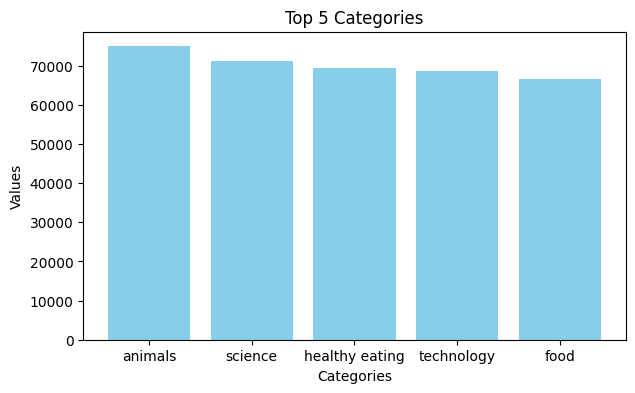

In [91]:
plt.figure(figsize=(7, 4))
plt.bar(top_5_categories['Category'],top_5_categories['total_score'], color='skyblue')
# Add a title and labels
plt.title('Top 5 Categories')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the plot
plt.show()

In [92]:
others_value = sorted_aggregated_data.iloc[5:]['total_score'].sum()
others_count = sorted_aggregated_data.iloc[5:]['count'].sum()
others_df = pd.DataFrame([['Others', others_count, others_value]], columns=['Category', 'count', 'total_score'])

# Step 5: Create final DataFrame with top 5 categories and "Others"
final_df = pd.concat([top_5_categories, others_df]).reset_index(drop=True)

# Print the final DataFrame
print(final_df)

         Category  count  total_score
0         animals   1897        74965
1         science   1796        71168
2  healthy eating   1717        69339
3      technology   1698        68738
4            food   1699        66676
5          Others  15766       622759


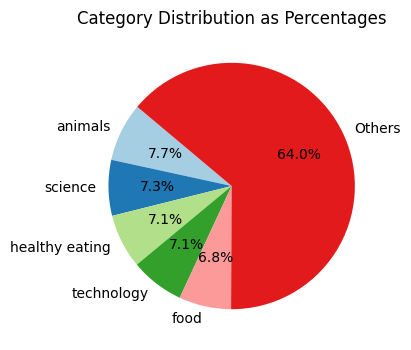

In [93]:
# Calculate the percentages for the pie chart
total_score = final_df['total_score'].sum()
percentages = (final_df['total_score'] / total_score) * 100

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(final_df['total_score'], labels=final_df['Category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(final_df))))
plt.title('Category Distribution as Percentages')
plt.show()

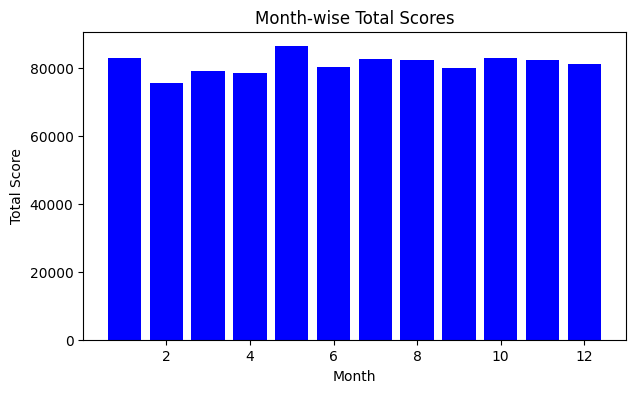

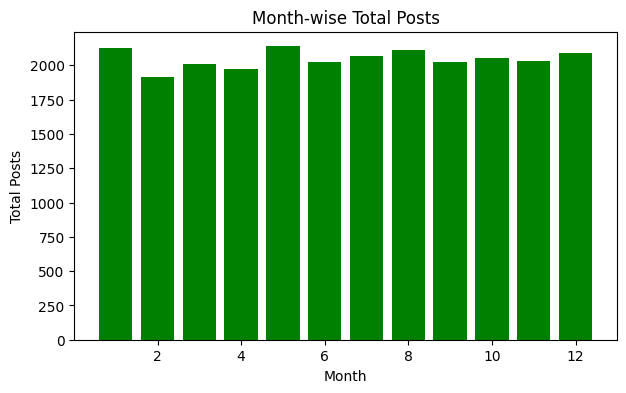

    month  Score
0       1  82938
1       2  75509
2       3  78915
3       4  78598
4       5  86293
5       6  80369
6       7  82464
7       8  82176
8       9  80077
9      10  82810
10     11  82333
11     12  81163
    month  Content ID
0       1        2126
1       2        1914
2       3        2012
3       4        1974
4       5        2138
5       6        2021
6       7        2070
7       8        2114
8       9        2022
9      10        2056
10     11        2034
11     12        2092


In [113]:
final_merged_df['Datetime'] = pd.to_datetime(final_merged_df['Datetime'],format='%d-%m-%Y %H:%M')
final_merged_df['month']=final_merged_df['Datetime'].dt.month
monthwise_scores = final_merged_df.groupby('month')['Score'].sum().reset_index()
monthwise_count=final_merged_df.groupby('month')['Content ID'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(7,4))
plt.bar(monthwise_scores['month'], monthwise_scores['Score'], color='blue')
plt.xlabel('Month')
plt.ylabel('Total Score')
plt.title('Month-wise Total Scores')
plt.show()
plt.figure(figsize=(7,4))
plt.bar(monthwise_count['month'], monthwise_count['Content ID'], color='green')
plt.xlabel('Month')
plt.ylabel('Total Posts')
plt.title('Month-wise Total Posts')
plt.show()
print(monthwise_scores)
print(monthwise_count)



